In [1]:
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)

In [2]:
print("Working directory:", os.getcwd())

Working directory: c:\Users\ayofa\OneDrive\Desktop\SDPA\dsmp-2024-group-19


# Import modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tools import read_merged_data
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
random_state = 42
np.random.seed(random_state)

# Load Data

In [4]:
merged_data = read_merged_data(124)
merged_df = pd.concat(merged_data, axis = 0)
merged_df.head()

Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv
Opening UoB_Set01_2025-01-06tapes.csv
Opening UoB_Set01_2025-01-07tapes.csv
Opening UoB_Set01_2025-01-08tapes.csv
Opening UoB_Set01_2025-01-09tapes.csv
Opening UoB_Set01_2025-01-10tapes.csv
Opening UoB_Set01_2025-01-13tapes.csv
Opening UoB_Set01_2025-01-14tapes.csv
Opening UoB_Set01_2025-01-15tapes.csv
Opening UoB_Set01_2025-01-16tapes.csv
Opening UoB_Set01_2025-01-17tapes.csv
Opening UoB_Set01_2025-01-20tapes.csv
Opening UoB_Set01_2025-01-21tapes.csv
Opening UoB_Set01_2025-01-22tapes.csv
Opening UoB_Set01_2025-01-23tapes.csv
Opening UoB_Set01_2025-01-24tapes.csv
Opening UoB_Set01_2025-01-27tapes.csv
Opening UoB_Set01_2025-01-28tapes.csv
Opening UoB_Set01_2025-01-29tapes.csv
Opening UoB_Set01_2025-01-30tapes.csv
Opening UoB_Set01_2025-01-31tapes.csv
Opening UoB_Set01_2025-02-03tapes.csv
Opening UoB_Set01_2025-02-04tapes.csv
Opening UoB_Set01_2025-02-05tapes.csv
Opening UoB_Set01_2025-02-06tapes.csv
Opening UoB_

,Incoming bid,Incoming ask,Outgoing bid,Outgoing ask,alpha,beta,LOB,mid_price,low_ask,high_bid,Volume,Tapes Price,Last Tapes Price
combined_time,,,,,,,,,,,,,
2025-01-02 08:00:00,[1 6],,,,NaN,NaN,"[['bid', [[1, 6]]], ['ask', []]]",NaN,NaN,1.0,NaN,NaN,NaN
2025-01-02 08:00:01,[261 1],[800 1][799 1][798 1][797 1],,[800 1][799 1][798 1],0.002986,0.015020,"[['bid', [[261, 1], [1, 6]]], ['ask', [[797, 1...",529.0,797.0,261.0,NaN,NaN,NaN
2025-01-02 08:00:02,[262 6],[338 3][297 5],[1 6],,0.238553,0.165031,"[['bid', [[262, 6], [261, 1]]], ['ask', [[297,...",279.5,297.0,262.0,NaN,NaN,NaN
2025-01-02 08:00:03,[263 6][264 6],[296 1][309 3][334 4][292 5][291 1][296 4],[262 6][263 6],[338 3][297 5][797 1][296 1] [309 3],0.524854,0.429582,"[['bid', [[264, 6], [261, 1]]], ['ask', [[291,...",277.5,291.0,264.0,NaN,NaN,NaN
2025-01-02 08:00:04,,[288 5][307 4][287 1] [296 3][287 4][300 4][28...,,[292 5][334 4][296 4][287 1] [296 3][307 4][29...,0.820913,0.541382,"[['bid', [[264, 6], [261, 1]]], ['ask', [[286,...",275.0,286.0,264.0,NaN,NaN,NaN


# Prepare Samples

In [5]:
def generate_sample(day, day_index, rnd, sizings, sample_index, sampling_rate) -> pd.DataFrame:
    train_start_time = day.index[rnd] # when referencing start <= segment < end
    train_end_time = day.index[rnd + sizings[0]]
    test_end_time1 = day.index[rnd + sizings[1]]
    test_end_time2 = day.index[rnd + sizings[2]]
    test_end_time3 = day.index[rnd + sizings[3]]
    row = {"sample_index": sample_index,
           "train_size (s)": sizings[0],
           "day_index": day_index,
           "train_start_time": train_start_time,
           "train_end_time": train_end_time,
           "test_end_time1": test_end_time1,
           "test_end_time2": test_end_time2,
           "test_end_time3": test_end_time3,
           "sampling_rate (s)": sampling_rate}
    row = pd.DataFrame([row])
    return row

# extract intra day segments
# train/test size

sample_index = 0
indicies = pd.DataFrame()
for i, d in enumerate(merged_data):
    print(i, end = "\r")
    N = len(d)
    # random samples (3 each)

    for _ in range(10):
        # 1 min / 1s,10s,20s - (60,61,70,80)
        sizings = (60,61,70,80)
        row = generate_sample(d, i, np.random.randint(0,N - sizings[3]), sizings, sample_index, 1)
        indicies = pd.concat([indicies, row], axis = 0)
        sample_index += 1

        
        # 12 min / 12s,2min,4min
        sizings = (12*60, 12*60+12, 14*60, 16*60)
        row = generate_sample(d, i, np.random.randint(0,N - sizings[3]), sizings, sample_index, 1)
        indicies = pd.concat([indicies, row], axis = 0)
        sample_index += 1

        # 60 min / 1min,10min,20min
        sizings = (60*60, 61*60, 70*60, 80*60)
        row = generate_sample(d, i, np.random.randint(0,N - sizings[3]), sizings, sample_index, 2)
        indicies = pd.concat([indicies, row], axis = 0)
        sample_index += 1

    # fixed samples
    # 3hr / 3min,30min,1hr
    # start_times = (8:00, 10:15, 12:30)
    sizings = (60*60*3, 60*60*3 + 3*60, 60*60*3 + 30*60, 60*60*4)
    row = generate_sample(d, i, 0, sizings, sample_index, 5) # 8:00
    indicies = pd.concat([indicies, row], axis = 0)
    sample_index += 1

    sizings = (60*60*3, 60*60*3 + 3*60, 60*60*3 + 30*60, 60*60*4)
    row = generate_sample(d, i, 15*60*9, sizings, sample_index, 5) # 10:15
    indicies = pd.concat([indicies, row], axis = 0)
    sample_index += 1

    sizings = (60*60*3, 60*60*3 + 3*60, 60*60*3 + 30*60, 60*60*4)
    row = generate_sample(d, i, 30*60*9 - 1, sizings, sample_index, 5) # 12:30
    indicies = pd.concat([indicies, row], axis = 0)
    sample_index += 1

indicies.index = indicies["sample_index"]
indicies.drop("sample_index", axis = 1, inplace=True)
indicies

,train_size (s),day_index,train_start_time,train_end_time,test_end_time1,test_end_time2,test_end_time3,sampling_rate (s)
sample_index,,,,,,,,
0,60,0,2025-01-02 14:34:14,2025-01-02 14:35:14,2025-01-02 14:35:15,2025-01-02 14:35:24,2025-01-02 14:35:34,1
1,720,0,2025-01-02 12:23:15,2025-01-02 12:35:15,2025-01-02 12:35:27,2025-01-02 12:37:15,2025-01-02 12:39:15,1
2,3600,0,2025-01-02 08:14:20,2025-01-02 09:14:20,2025-01-02 09:15:20,2025-01-02 09:24:20,2025-01-02 09:34:20,2
3,60,0,2025-01-02 09:29:50,2025-01-02 09:30:50,2025-01-02 09:30:51,2025-01-02 09:31:00,2025-01-02 09:31:10,1
4,720,0,2025-01-02 13:59:35,2025-01-02 14:11:35,2025-01-02 14:11:47,2025-01-02 14:13:35,2025-01-02 14:15:35,1
...,...,...,...,...,...,...,...,...
4120,720,124,2025-07-01 14:13:53,2025-07-01 14:25:53,2025-07-01 14:26:05,2025-07-01 14:27:53,2025-07-01 14:29:53,1
4121,3600,124,2025-07-01 08:18:09,2025-07-01 09:18:09,2025-07-01 09:19:09,2025-07-01 09:28:09,2025-07-01 09:38:09,2
4122,10800,124,2025-07-01 08:00:00,2025-07-01 11:00:00,2025-07-01 11:03:00,2025-07-01 11:30:00,2025-07-01 12:00:00,5


# 60min

In [6]:
sixty_df = pd.DataFrame()

# def y_score(diff):
#     if diff == 0:
#         return 0
#     elif diff > 0:
#         return 1
#     else:
#         return -1
    
def y_score(diff):
    if abs(diff) < 0.001:
        return 0
    elif diff > 0:
        return 1
    else:
        return -1

for i, row in indicies[indicies["train_size (s)"] == 3600].iterrows():
    print(i, end = "\r")
    segment = merged_df[(merged_df.index >= row["train_start_time"]) & (merged_df.index < row["train_end_time"])]
    x = {}
    for col in list(segment.columns):
        s = segment[col]
        if col in ["alpha", "beta"]:
            x[col] = s.fillna(0).mean()
            
        elif col in ["Volume"]:
            x[col] = s.fillna(0).mean() / 5

        if col in ["alpha", "beta", "low_ask", "mid_price", "high_bid", "Last Tapes Price", "Volume"]:
            s = s.dropna()
            x[col+"_trend"] = np.corrcoef(s.index.astype(np.int64) // 10**9,s)[0, 1]
            if col != "Volume":
                x[col+"_delta"] = 1 - (s.iloc[-1] / s.iloc[0])

    x["y1"] = y_score(merged_df.loc[row["test_end_time1"]]["Last Tapes Price"] - merged_df.loc[row["train_end_time"]]["Last Tapes Price"])
    x["y2"] = y_score(merged_df.loc[row["test_end_time2"]]["Last Tapes Price"] - merged_df.loc[row["train_end_time"]]["Last Tapes Price"])
    x["y3"] = y_score(merged_df.loc[row["test_end_time3"]]["Last Tapes Price"] - merged_df.loc[row["train_end_time"]]["Last Tapes Price"])

    sixty_df = pd.concat([sixty_df, pd.DataFrame([x])])

sixty_df.reset_index(inplace=True)

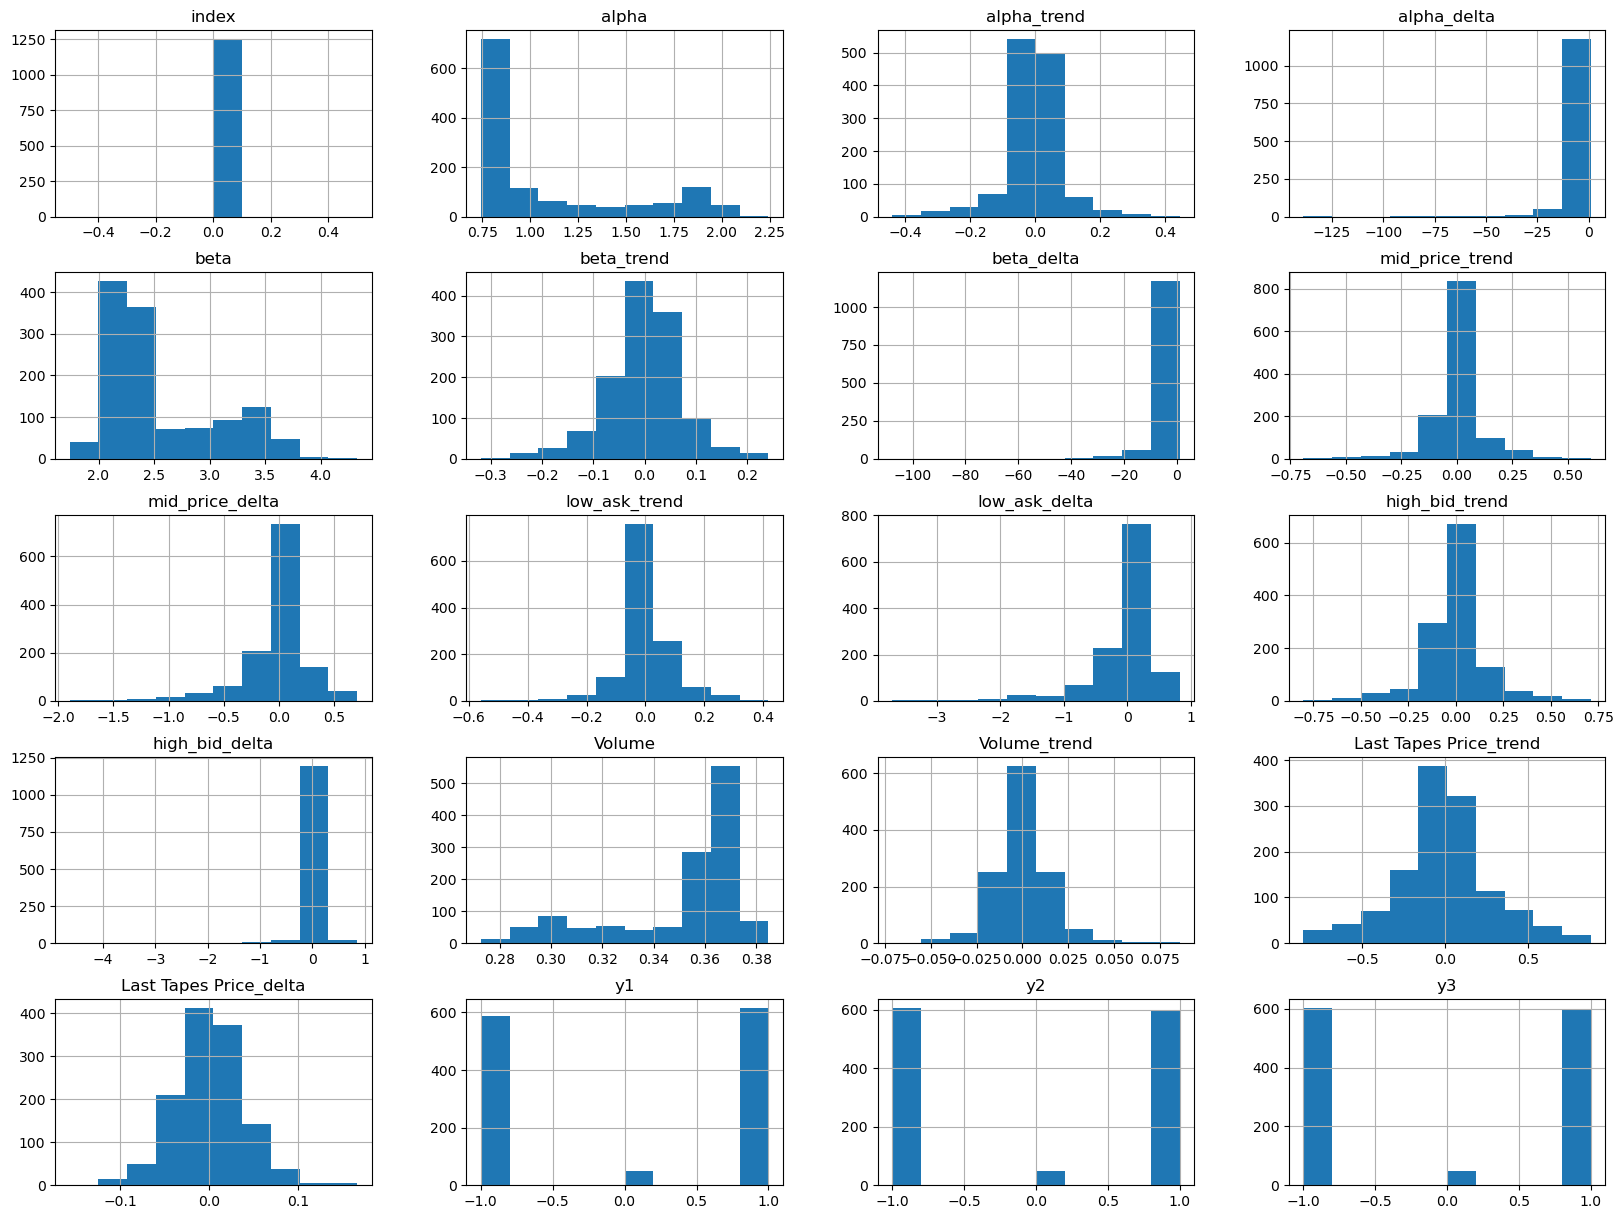

In [7]:
sixty_df.hist(figsize=(20,15))
plt.show()

# Decision Tree 

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


# Assuming sixty_df is your DataFrame and it's already loaded

# Define your features and target variable
X = sixty_df.drop(['y1', 'y2', 'y3'], axis=1)
y = sixty_df['y1']  # Adjust according to your target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Specify parameters and distributions to sample from
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(range(1, 21)),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None] + list(range(5, 31))
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, verbose=1)

# Perform the random search
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best cross-validated accuracy:", random_search.best_score_)

# Train a final model with the best parameters
best_dt = random_search.best_estimator_

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))

# Evaluate the final model on the test set
y_pred = best_dt.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'min_samples_split': 18, 'min_samples_leaf': 16, 'max_leaf_nodes': 5, 'max_features': None, 'max_depth': 17, 'criterion': 'gini'}
Best cross-validated accuracy: 0.6210000000000001
Baseline:  0.5072
Accuracy on Test Set: 0.584
              precision    recall  f1-score   support

          -1       0.53      0.73      0.61       107
           0       0.00      0.00      0.00         8
           1       0.67      0.50      0.57       135

    accuracy                           0.58       250
   macro avg       0.40      0.41      0.40       250
weighted avg       0.59      0.58      0.57       250



                   Feature  Importance
0           high_bid_delta    0.614005
1   Last Tapes Price_delta    0.249782
2   Last Tapes Price_trend    0.136214
3            low_ask_trend    0.000000
4             Volume_trend    0.000000
5                   Volume    0.000000
6           high_bid_trend    0.000000
7            low_ask_delta    0.000000
8                    index    0.000000
9                    alpha    0.000000
10         mid_price_trend    0.000000
11              beta_delta    0.000000
12              beta_trend    0.000000
13                    beta    0.000000
14             alpha_delta    0.000000
15             alpha_trend    0.000000
16         mid_price_delta    0.000000


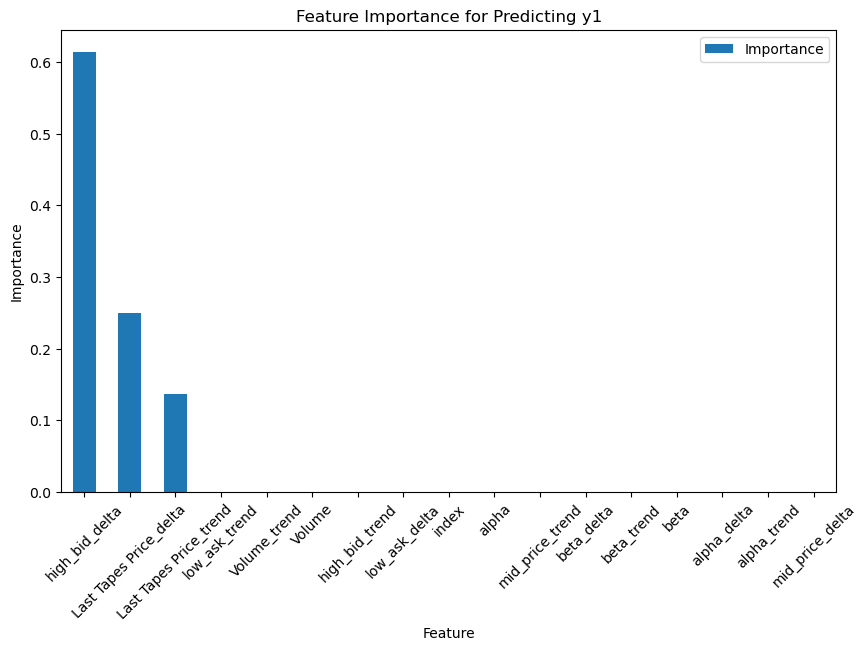

In [13]:
# Assuming 'best_dt' is the trained Decision Tree model for predicting 'y1'
feature_importances = best_dt.feature_importances_

# Assuming your feature names are stored in 'features'
features = X.columns  # 'X' should contain the features used to train the model

# Create a DataFrame to display feature names alongside their importances
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the feature importances
print(importances_df)

# Plot the feature importances for better visualization
importances_df.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.title('Feature Importance for Predicting y1')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.show()


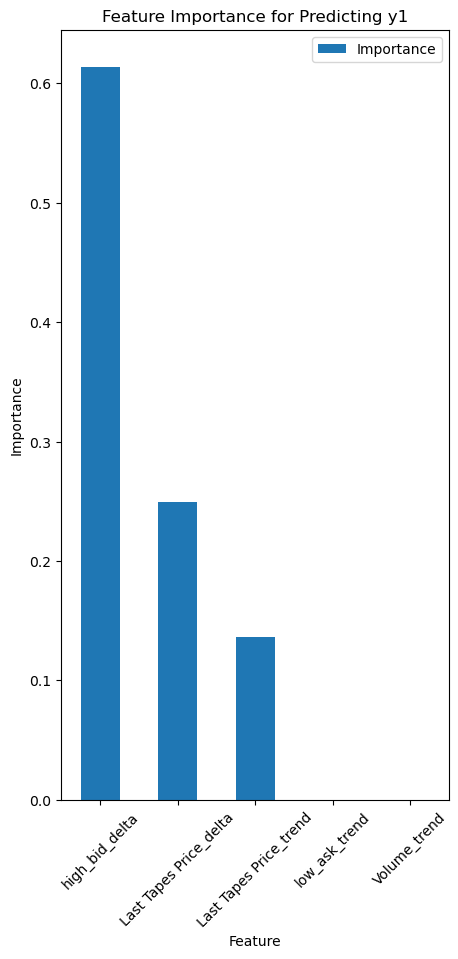

In [14]:
# Plot the feature importances for better visualization
importances_df[0:5].plot(kind='bar', x='Feature', y='Importance', figsize=(5, 10))
plt.title('Feature Importance for Predicting y1')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.show()


In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=X.columns, class_names=['Down', 'No Change', 'Up'], filled=True)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['index', 'alpha', 'alpha_trend', 'alpha_delta', 'beta', 'beta_trend',
       'beta_delta', 'mid_price_trend', 'mid_price_delta', 'low_ask_trend',
       'low_ask_delta', 'high_bid_trend', 'high_bid_delta', 'Volume',
       'Volume_trend', 'Last Tapes Price_trend', 'Last Tapes Price_delta'],
      dtype='object') instead.

<Figure size 2000x1000 with 0 Axes>

In [16]:
# Adjust the target variable to y2
y = sixty_df['y2']  # Use y2 as the target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Specify parameters and distributions to sample from for RandomizedSearchCV
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(range(1, 21)),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None] + list(range(5, 31))
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, verbose=1)

# Perform the random search
random_search.fit(X_train, y_train)

# Best parameters and best score for y2
print("Best Parameters:", random_search.best_params_)
print("Best cross-validated accuracy:", random_search.best_score_)

# Train a final model with the best parameters for y2
best_dt_y2 = random_search.best_estimator_

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))

# Evaluate the final model on the test set for y2
y_pred_y2 = best_dt_y2.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_y2))
print(classification_report(y_test, y_pred_y2))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'min_samples_split': 11, 'min_samples_leaf': 14, 'max_leaf_nodes': 11, 'max_features': None, 'max_depth': 8, 'criterion': 'gini'}
Best cross-validated accuracy: 0.602
Baseline:  0.5232
Accuracy on Test Set: 0.588
              precision    recall  f1-score   support

          -1       0.58      0.72      0.64       123
           0       0.00      0.00      0.00        11
           1       0.60      0.50      0.55       116

    accuracy                           0.59       250
   macro avg       0.39      0.41      0.40       250
weighted avg       0.56      0.59      0.57       250



                   Feature  Importance
0           high_bid_delta    0.393366
1   Last Tapes Price_delta    0.198751
2   Last Tapes Price_trend    0.109468
3               beta_trend    0.106896
4          mid_price_trend    0.074255
5           high_bid_trend    0.061044
6             Volume_trend    0.056220
7            low_ask_delta    0.000000
8                   Volume    0.000000
9                    index    0.000000
10           low_ask_trend    0.000000
11                   alpha    0.000000
12              beta_delta    0.000000
13                    beta    0.000000
14             alpha_delta    0.000000
15             alpha_trend    0.000000
16         mid_price_delta    0.000000


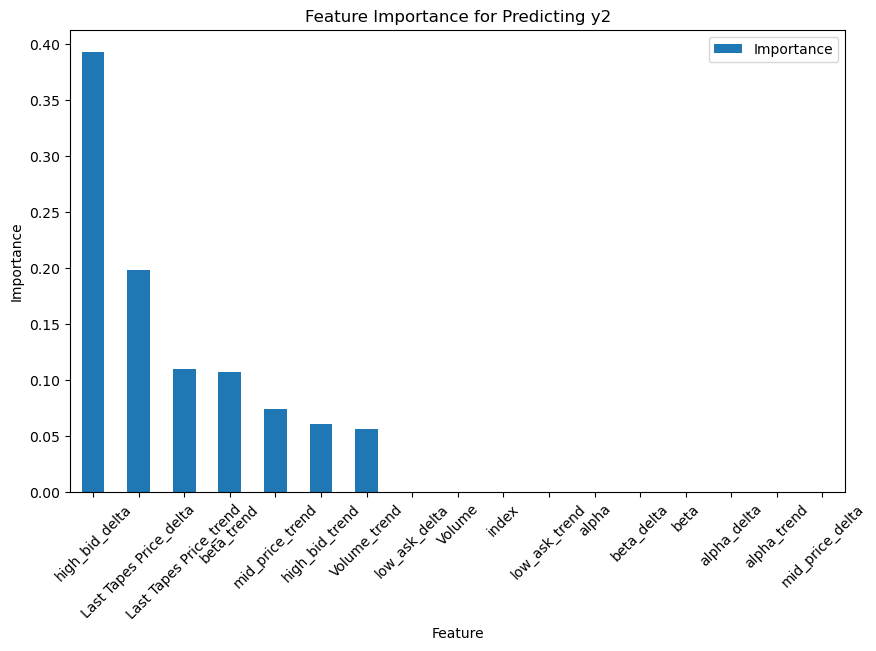

In [17]:
# Extracting feature importance for the model trained on y2
feature_importances_y2 = best_dt_y2.feature_importances_

# Creating a DataFrame for visualization
features = X.columns
importances_df_y2 = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_y2
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Displaying the feature importances for y2
print(importances_df_y2)

# Plotting feature importances
importances_df_y2.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.title('Feature Importance for Predicting y2')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.show()


In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_dt_y2, feature_names=X.columns, class_names=['Down', 'No Change', 'Up'], filled=True)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['index', 'alpha', 'alpha_trend', 'alpha_delta', 'beta', 'beta_trend',
       'beta_delta', 'mid_price_trend', 'mid_price_delta', 'low_ask_trend',
       'low_ask_delta', 'high_bid_trend', 'high_bid_delta', 'Volume',
       'Volume_trend', 'Last Tapes Price_trend', 'Last Tapes Price_delta'],
      dtype='object') instead.

<Figure size 2000x1000 with 0 Axes>

In [ ]:
# Adjust the target variable to y2
y = sixty_df['y3']  # Use y2 as the target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Specify parameters and distributions to sample from for RandomizedSearchCV
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(range(1, 21)),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21),
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None] + list(range(5, 31))
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, verbose=1)

# Perform the random search
random_search.fit(X_train, y_train)

# Best parameters and best score for y2
print("Best Parameters:", random_search.best_params_)
print("Best cross-validated accuracy:", random_search.best_score_)

# Train a final model with the best parameters for y2
best_dt_y3 = random_search.best_estimator_

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))

# Evaluate the final model on the test set for y2
y_pred_y3 = best_dt_y3.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_y2))
print(classification_report(y_test, y_pred_y2))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'min_samples_split': 8, 'min_samples_leaf': 4, 'max_leaf_nodes': 22, 'max_features': 'auto', 'max_depth': 14, 'criterion': 'gini'}
Best cross-validated accuracy: 0.5980000000000001
Baseline:  0.5216000000000001
Accuracy on Test Set: 0.568
              precision    recall  f1-score   support

          -1       0.55      0.71      0.62       118
           0       0.00      0.00      0.00        13
           1       0.60      0.49      0.54       119

    accuracy                           0.57       250
   macro avg       0.38      0.40      0.39       250
weighted avg       0.55      0.57      0.55       250



                   Feature  Importance
0   Last Tapes Price_delta    0.315161
1           high_bid_trend    0.145906
2          mid_price_delta    0.116229
3   Last Tapes Price_trend    0.103860
4           high_bid_delta    0.095762
5             Volume_trend    0.051511
6               beta_trend    0.048890
7            low_ask_trend    0.038215
8                    alpha    0.034880
9            low_ask_delta    0.027995
10             alpha_delta    0.021590
11                    beta    0.000000
12              beta_delta    0.000000
13         mid_price_trend    0.000000
14             alpha_trend    0.000000
15                  Volume    0.000000
16                   index    0.000000


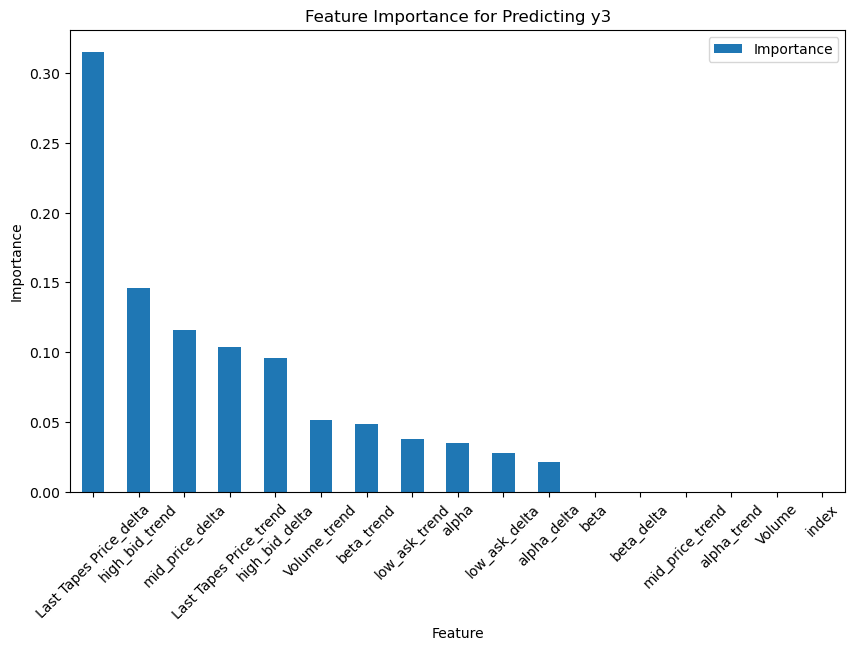

In [ ]:
# Extracting feature importance for the model trained on y3
feature_importances_y3 = best_dt_y3.feature_importances_

# Creating a DataFrame for visualization
features = X.columns
importances_df_y3 = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_y3
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Displaying the feature importances for y3
print(importances_df_y3)

# Plotting feature importances
importances_df_y3.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.title('Feature Importance for Predicting y3')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.show()


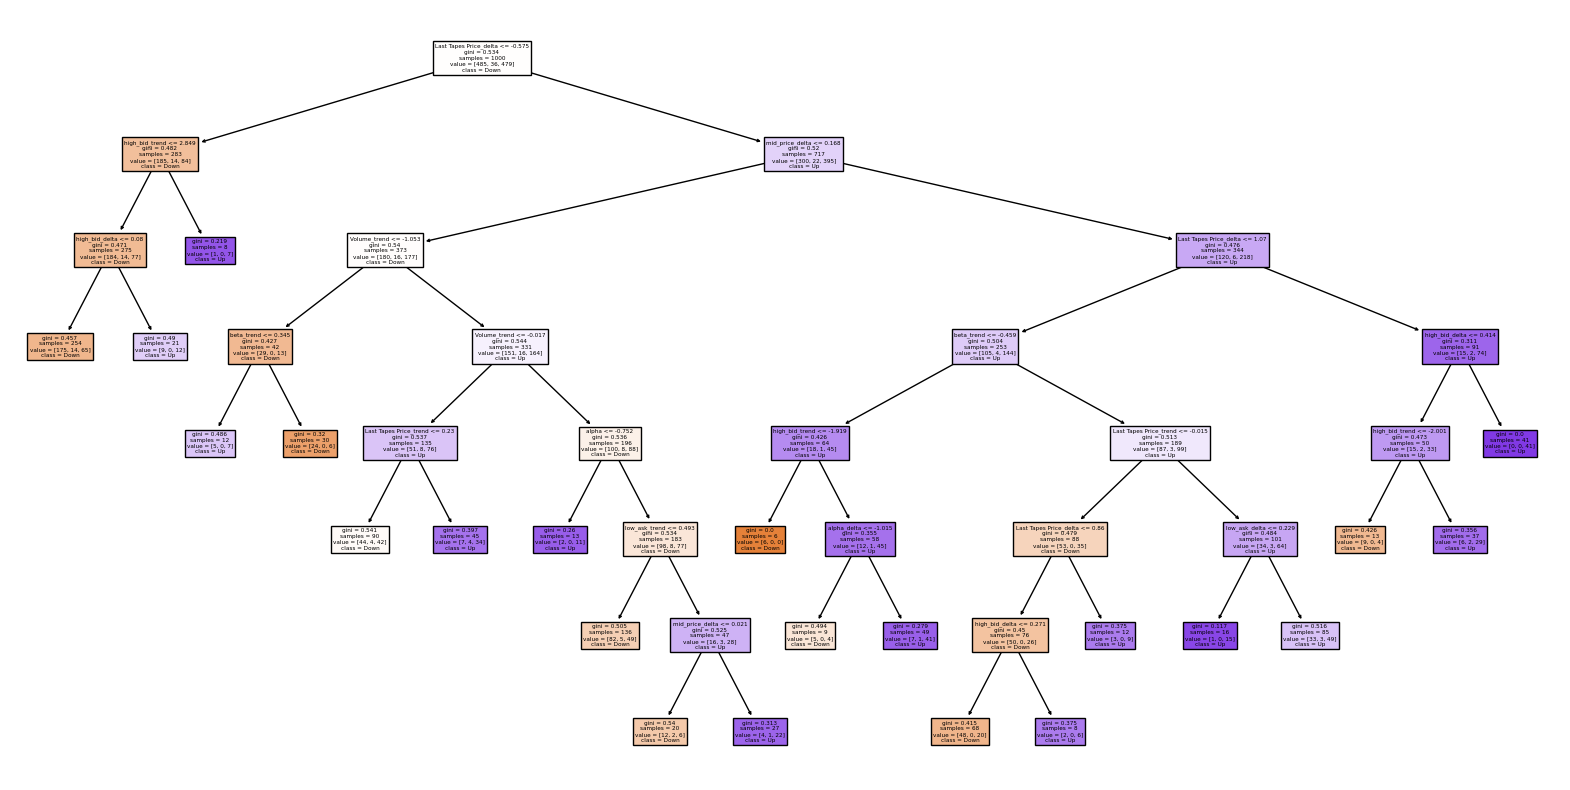

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(best_dt_y3, feature_names=X.columns, class_names=['Down', 'No Change', 'Up'], filled=True)
plt.show()